<a href="https://colab.research.google.com/github/teestar5/lesson00/blob/NeJron/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%97_Ultra_Pro_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%7C_%D0%A3%D0%98%D0%98_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [42]:
from keras.preprocessing import image
import numpy as np
from IPython.display import display
from IPython.display import Image
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [43]:
# Ваше решение
from google.colab import files

In [44]:
files.upload()

Saving пять.png to пять (3).png


{'пять (3).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1b\x00\x00\x00\x1e\x08\x06\x00\x00\x00\xdd\x19e\xe6\x00\x00\x00\x04gAMA\x00\x00\xb1\x9eaLA\xf7\x00\x00\x00 cHRM\x00\x00\x87\x10\x00\x00\x8c\x12\x00\x00\xfdM\x00\x00\x81>\x00\x00Y\xeb\x00\x01\x12\x0f\x00\x00<\xe6\x00\x00\x19\xce\xba\xc9"2\x00\x00\x01&iCCPAdobe RGB (1998)\x00\x00(\xcfc``2ptqre\x12``\xc8\xcd+)\nrwR\x88\x88\x8cR`?\xcf\xc0\xc6\xc0\xcc\x00\x06\x89\xc9\xc5\x05\x8e\x01\x01> v^~^*\x03\x06\xf8v\x8d\x81\x11D_\xd6\x05\x99\xc5@\x1a\xe0J.(*\x01\xd2\x7f\x80\xd8(%\xb58\x99\x81\x81\xd1\x00\xc8\xce./)\x00\x8a3\xce\x01\xb2E\x92\xb2\xc1\xec\r vQH\x903\x90}\x04\xc8\xe6K\x87\xb0\xaf\x80\xd8I\x10\xf6\x13\x10\xbb\x08\xe8\t \xfb\x0bH}:\x98\xcd\xc4\x016\x07\xc2\x96\x01\xb1KR+@\xf628\xe7\x17T\x16e\xa6g\x94(\x18ZZZ*8\xa6\xe4\'\xa5*\x04W\x16\x97\xa4\xe6\x16+x\xe6%\xe7\x17\x15\xe4\x17%\x96\xa4\xa6\x00\xd5B\xdc\x07\x06\x82\x10\x85\xa0\x10\xd3\x00j\xb4\xd0d\xa02\x00\xc5\x03\x84\xf59\x10\x1c\xbe\x8cbg\x10b\x08\x90\\ZT\x06e22\x19\x13\x

In [45]:
!ls

 mnist_model.h5  'пять (1).png'  'пять (3).png'   три.png
 sample_data	 'пять (2).png'   пять.png


In [46]:
from IPython.display import Image

Image('пять.png')

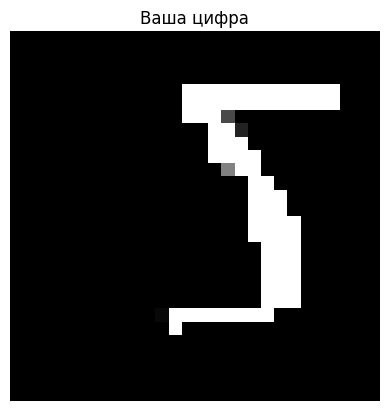

In [47]:
# Предположим, что вы загрузили файл с именем 'digit.png'
img_path = 'пять.png'

# Загружаем изображение и приводим к нужному формату: 28x28, оттенки серого
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Преобразуем в массив (28, 28)
img_array = image.img_to_array(img)

# Инвертируем цвета: делаем цифру белой на черном фоне
img_array = 255 - img_array

# Нормализуем значения (0-1)
img_array /= 255.0

# Добавляем ось batch: (1, 28, 28, 1)
img_input = img_array.reshape(1, 28, 28, 1)

# Отображаем изображение после обработки
plt.imshow(img_input[0], cmap='gray')
plt.title("Ваша цифра")
plt.axis('off')
plt.show()

# 1. Загружаем данные MNIST

# 2. Нормализуем и изменяем форму данных


 #Преобразуем метки в one-hot кодировку

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist

# Загружаем MNIST (для примера)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация и добавление канала
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Создаем простую CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучаем модель
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Сохраняем модель
model.save('mnist_model.h5')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9119 - loss: 0.2990 - val_accuracy: 0.9800 - val_loss: 0.0662
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0539 - val_accuracy: 0.9828 - val_loss: 0.0493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9855 - val_loss: 0.0447
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9864 - val_loss: 0.0398
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9858 - val_loss: 0.0474
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9967 - loss: 0.0107 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9844 - val_loss: 0.0565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9987 - loss: 0.0045

In [49]:
# Делаем предсказание
prediction = model.predict(img_input)

# Выводим вероятности
print("Вероятности:", prediction[0])

# Находим предсказанную цифру
predicted_digit = np.argmax(prediction)
print(f"\nПредсказанная цифра: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Вероятности: [8.3977611e-06 2.3250820e-11 9.9953032e-01 1.8620040e-05 4.2169264e-09
 7.1865105e-07 3.4134878e-12 4.4018312e-04 6.3847660e-09 1.8696828e-06]

Предсказанная цифра: 2


# Train the model


In [ ]:
#model_instance.fit(x_train, y_train_cat, epochs=10)

In [ ]:
# img = image.load_img('три.png', target_size=(28, 28), color_mode='grayscale')
# img_array = image.img_to_array(img)
# img_inverted = 255 - img_array
# img_normalized = img_inverted / 255.0
# img_reshaped = np.expand_dims(img_normalized, axis=0)  # Форма: (1, 28, 28, 1)

In [ ]:
# prediction = model_instance.predict(img_reshaped)
# digit_class = np.argmax(prediction)

# print("Модель думает, что это цифра:", digit_class)